In [1]:
# import important libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# number of rows and column
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# check  for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Data Analysis**

In [6]:
# understand data at high level. Check the statistics of data set.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


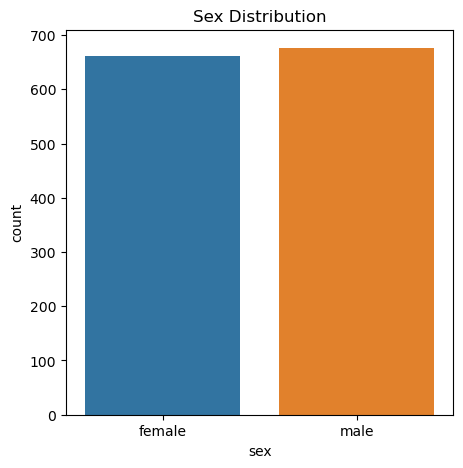

In [7]:
# gender countplot
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data =df)
plt.title("Sex Distribution")
plt.show()

In [8]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

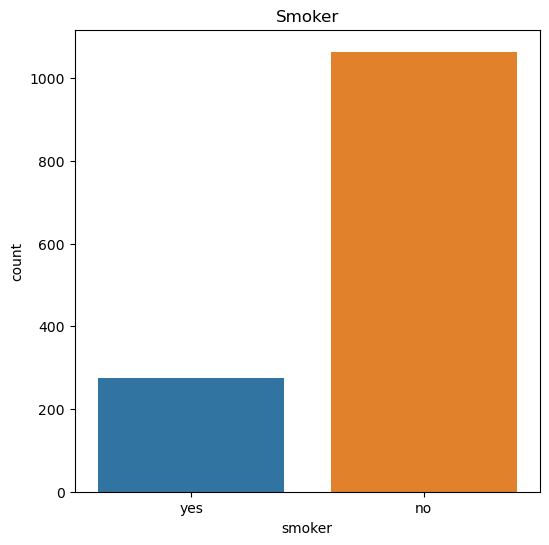

In [9]:
# smoker CountPlot
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data =df)
plt.title("Smoker")
plt.show()

In [10]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

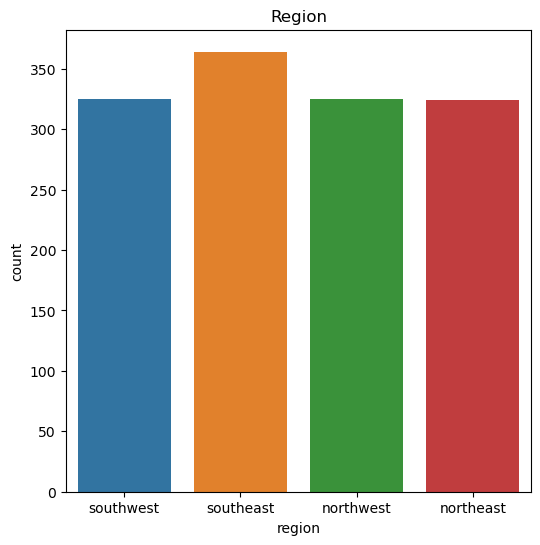

In [11]:
# Region CountPlot
plt.figure(figsize=(6,6))
sns.countplot(x='region', data =df)
plt.title("Region")
plt.show()

In [12]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

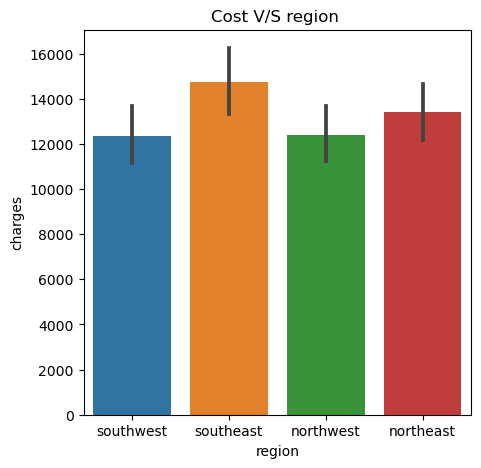

In [13]:
# cost v/s region barplot
plt.figure(figsize=(5,5))
sns.barplot(x='region',y = 'charges', data =df)
plt.title("Cost V/S region ")
plt.show()

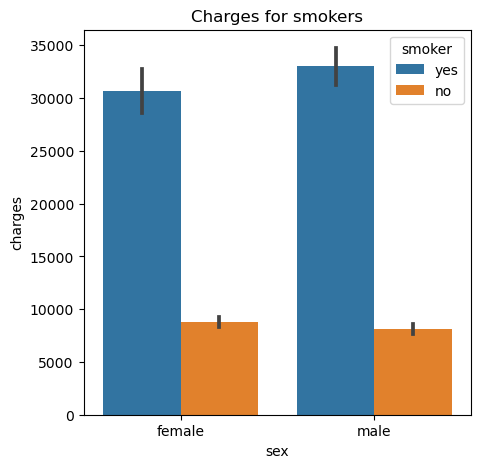

In [18]:
# cost v/s region barplot
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y = 'charges',hue='smoker', data =df)
plt.title("Charges for smokers")
plt.show()

<Axes: xlabel='region', ylabel='charges'>

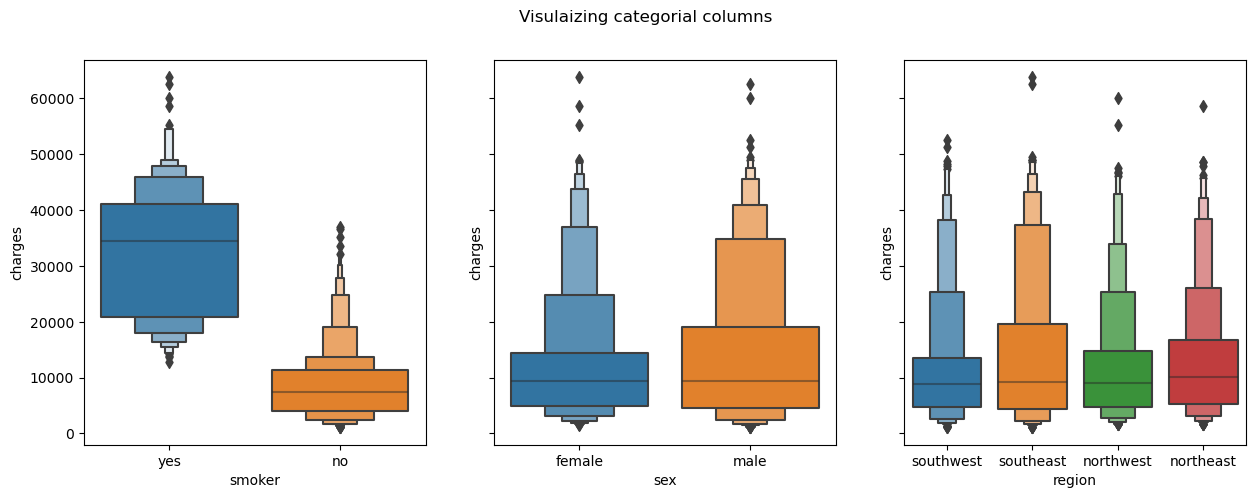

In [26]:
#boxplot
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey = True)
fig.suptitle('Visulaizing categorial columns')
sns.boxenplot(x='smoker', y='charges', data = df, ax=axes[0])
sns.boxenplot(x='sex', y='charges', data = df, ax=axes[1])
sns.boxenplot(x='region', y='charges', data = df, ax=axes[2])

<function matplotlib.pyplot.show(close=None, block=None)>

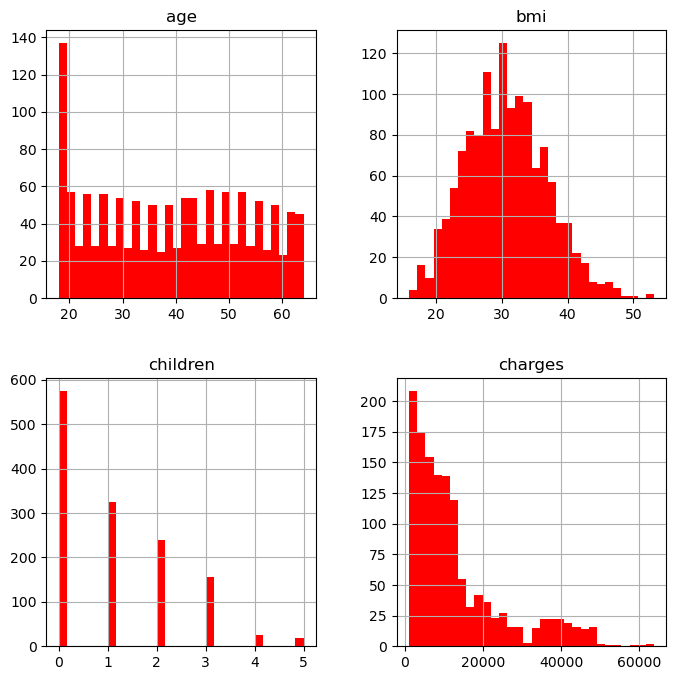

In [23]:
df[['age','bmi','children','charges']].hist(bins=30, figsize = (8,8),color = 'red')
plt.show

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
# convering categorial features into numerical features
df.replace({'sex':{'male': 0, 'female': 1}}, inplace = True)
df.replace({'smoker':{'yes':0, 'no':1}}, inplace = True)
df.replace({'region':{'southwest':0, 'southeast':1, 'northeast':2, 'northwest':3}}, inplace = True)

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


<function matplotlib.pyplot.show(close=None, block=None)>

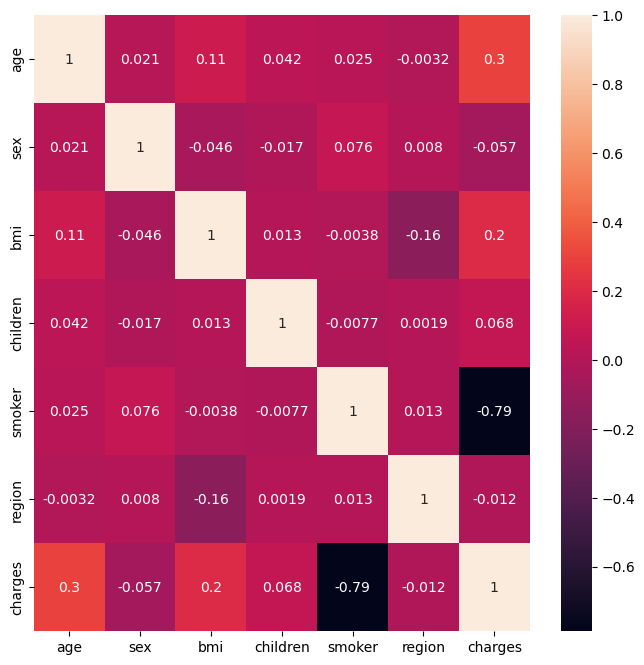

In [33]:
# heatmap
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True)
plt.show

**Train_test_split**

In [35]:
x = df.drop(columns = ['charges','sex'], axis = 1)
y = df['charges']

**Split into training & testing data**

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state = 42)

**Model Training**

**Linear Regression**

In [37]:
lr = LinearRegression()

In [38]:
lr

LinearRegression()

In [40]:
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [41]:
from sklearn.metrics import r2_score

In [42]:
print("R2 Score :",(r2_score(y_test, pred)))

R2 Score : 0.7695459725681215


<function matplotlib.pyplot.show(close=None, block=None)>

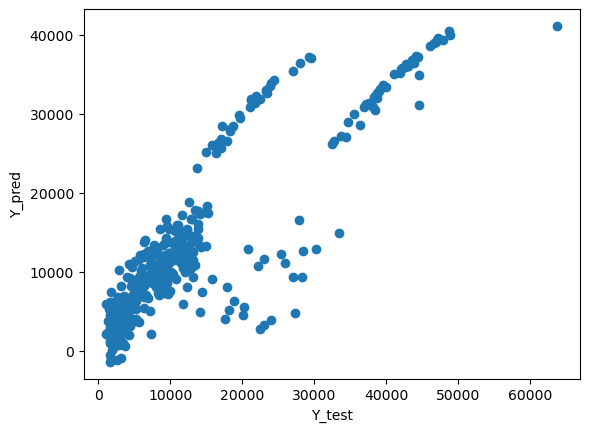

In [43]:
plt.scatter(y_test, pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show

In [48]:
data = (21,25.80,0,1,0)
# changing the data into numpy array
data_as_numpy = np.asarray(data)
# reshape the data as we are predicting the label for only one instance 
data_reshaped = data_as_numpy.reshape(1,-1)
prediction = lr.predict(data_reshaped)
print("Cost of insurance",prediction)

Cost of insurance [1262.89093348]
